In [ ]:
# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Results
results_path = '../results/optics_results.csv'
df = pd.read_csv(results_path)
df.head()

,Dataset,Metric,Algorithm,Min Samples,Silhouette,ARI,DBI,Num Clusters,Time (s)
0,satimage,chebyshev,ball_tree,3,0.141281,0.019670,1.172211,158,41.923642
1,satimage,chebyshev,ball_tree,5,0.233188,0.013701,1.130669,46,45.852925
2,satimage,chebyshev,ball_tree,10,0.600181,0.003914,0.823616,11,45.970746
3,satimage,chebyshev,ball_tree,20,0.706418,0.014273,0.434989,6,40.805201
4,satimage,chebyshev,brute,3,0.141281,0.019670,1.172211,158,133.419555


### **Data Preprocessing**

In [5]:
# Convert numerical columns to float
metrics = ['Silhouette', 'ARI', 'DBI', 'Time (s)']
df[metrics] = df[metrics].astype(float)

### **Plotting**

#### **Silhouette Score vs. Metric**

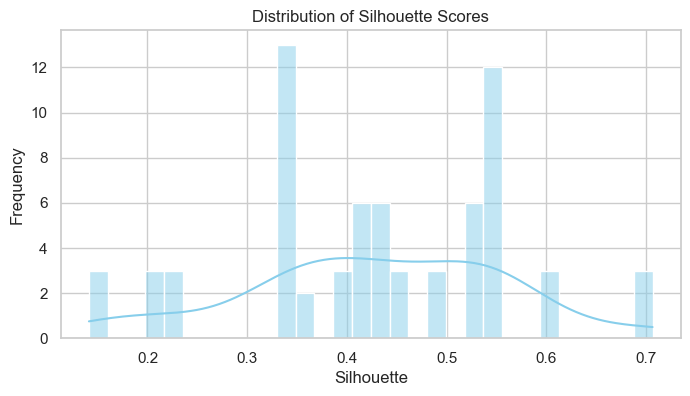

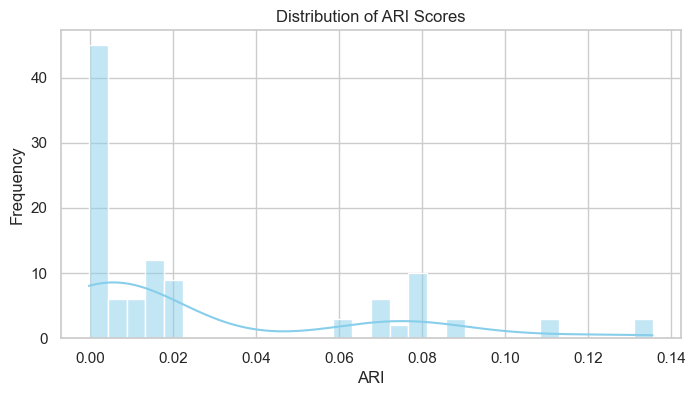

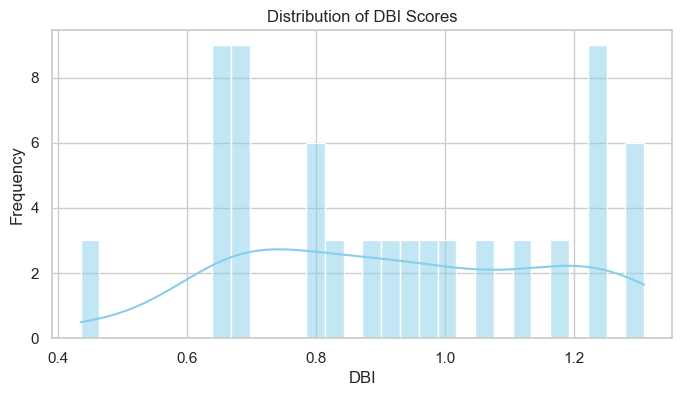

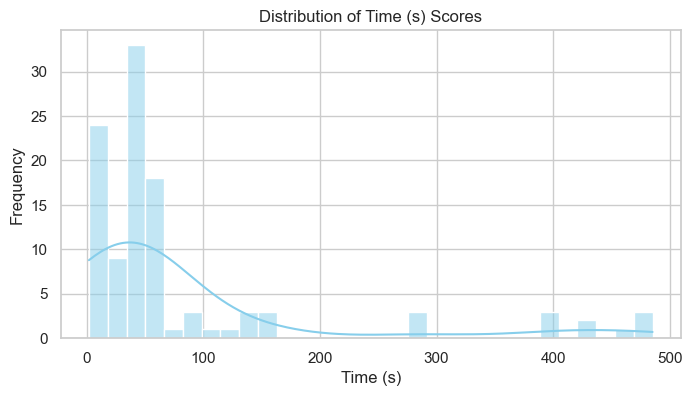

In [6]:
# Set up the plotting style
sns.set(style='whitegrid')

# Plot histograms for each metric
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[metric], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {metric} Scores')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.show()


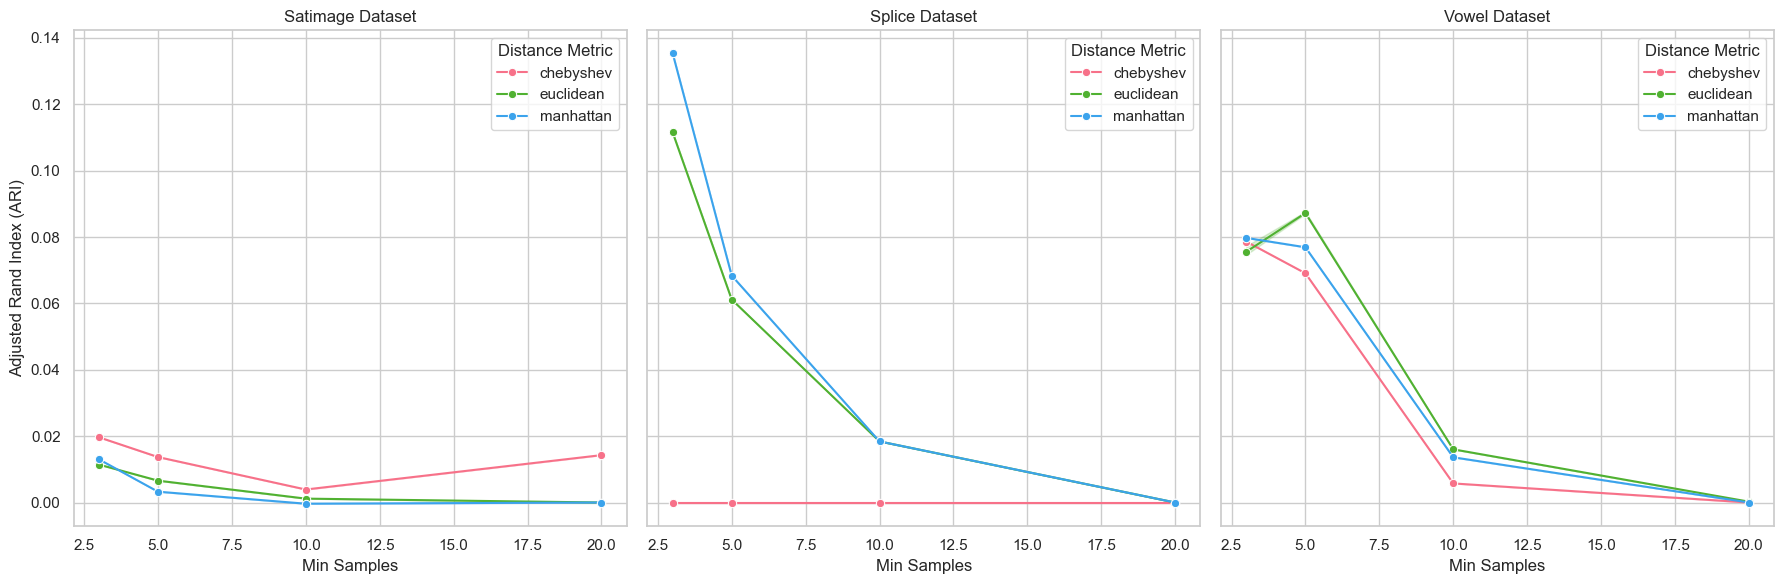

In [13]:
# List of datasets
datasets = df['Dataset'].unique()

# Set the plotting style
sns.set(style='whitegrid')

# Create a color palette
palette = sns.color_palette("husl", len(df['Metric'].unique()))

# Initialize the matplotlib figure
fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6), sharey=True)

for ax, dataset in zip(axes, datasets):
    subset = df[df['Dataset'] == dataset]
    sns.lineplot(
        data=subset,
        x='Min Samples',
        y='ARI',
        hue='Metric',
        marker='o',
        palette=palette,
        ax=ax
    )
    ax.set_title(f'{dataset.capitalize()} Dataset')
    ax.set_xlabel('Min Samples')
    ax.set_ylabel('Adjusted Rand Index (ARI)')
    ax.legend(title='Distance Metric')
    
plt.tight_layout()
plt.show()

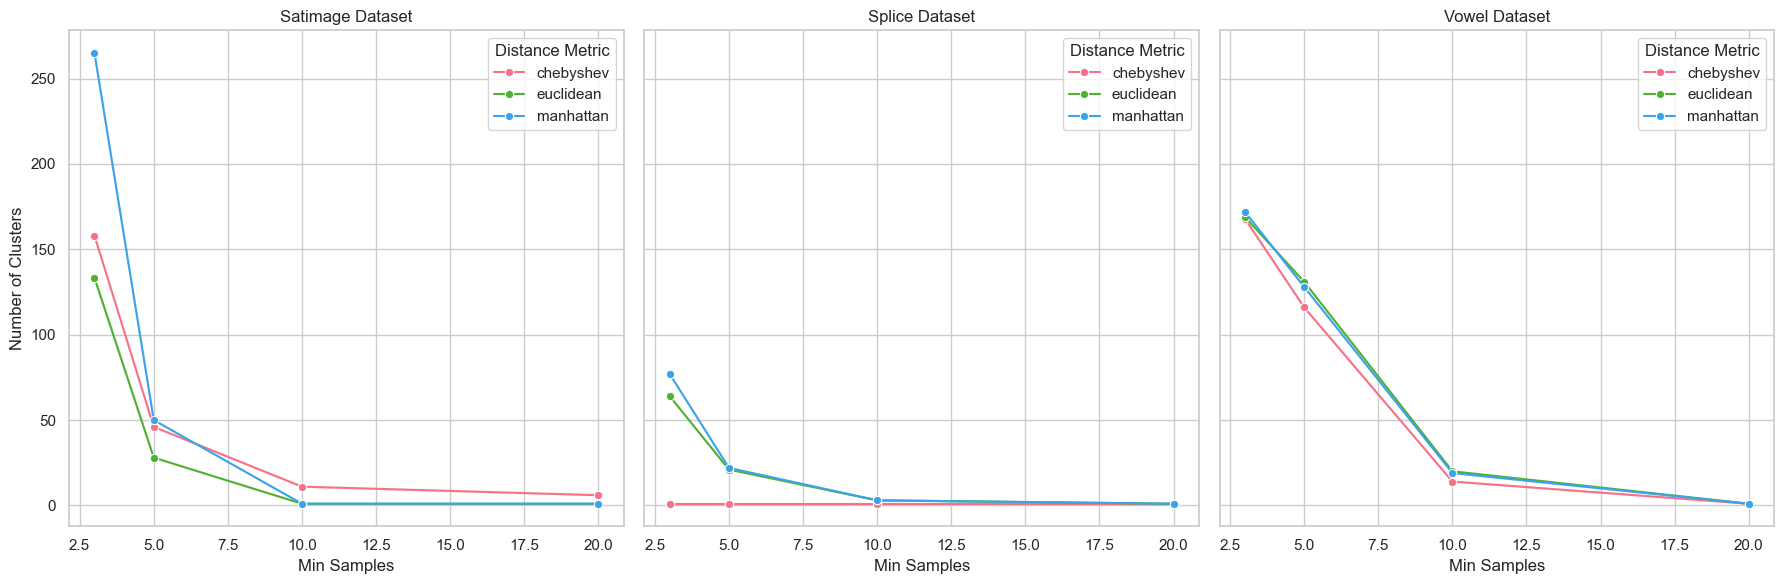

In [9]:
# List of datasets
datasets = df['Dataset'].unique()

# Set the plotting style
sns.set(style='whitegrid')

# Create a color palette
palette = sns.color_palette("husl", len(df['Metric'].unique()))

# Initialize the matplotlib figure
fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6), sharey=True)

for ax, dataset in zip(axes, datasets):
    subset = df[df['Dataset'] == dataset]
    sns.lineplot(
        data=subset,
        x='Min Samples',
        y='Num Clusters',
        hue='Metric',
        marker='o',
        palette=palette,
        ax=ax
    )
    ax.set_title(f'{dataset.capitalize()} Dataset')
    ax.set_xlabel('Min Samples')
    ax.set_ylabel('Number of Clusters')
    ax.legend(title='Distance Metric')
    
plt.tight_layout()
plt.show()


### **Checking Data Sparsity**

- Sparsity of satimage is (False, 0.0)
- Sparsity of splice is (True, 0.7909407665505227)
- Sparsity of vowel is (True, 0.5517241379310345)